In [1]:
%reload_ext blackcellmagic
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from qflow.wavefunctions import RBMWavefunction as RBM
from qflow.wavefunctions import RBMSymmetricWavefunction as SRBM

from qflow.hamiltonians import (
    RBMHarmonicOscillatorHamiltonian,
    RBMInteractingHamiltonian,
)

from qflow.samplers import MetropolisSampler, ImportanceSampler
from qflow.optimizers import AdamOptimizer, SgdOptimizer
from qflow.training import train, EnergyCallback, SymmetryCallback, ParameterCallback
from qflow.statistics import compute_statistics_for_series


# Ideal Harmonic Oscillator


In [2]:
H0 = RBMHarmonicOscillatorHamiltonian()


In [3]:
P, D = 2, 2  # Particles, dimensions
N = 2  # Hidden nodes
system = np.empty((P, D))


## Non-symmetric RBM


In [4]:
rbm = RBM(P * D, N)
rbm_sampler = ImportanceSampler(system, rbm, step_size=0.1)


In [5]:
rbm_energies = EnergyCallback(samples=5000)
rbm_symmetries = SymmetryCallback(samples=10000)
rbm_parameters = ParameterCallback()

train(
    rbm,
    H0,
    rbm_sampler,
    iters=500,
    samples=500,
    gamma=0,
    optimizer=AdamOptimizer(len(rbm.parameters)),
    call_backs=(rbm_energies, rbm_symmetries, rbm_parameters),
)


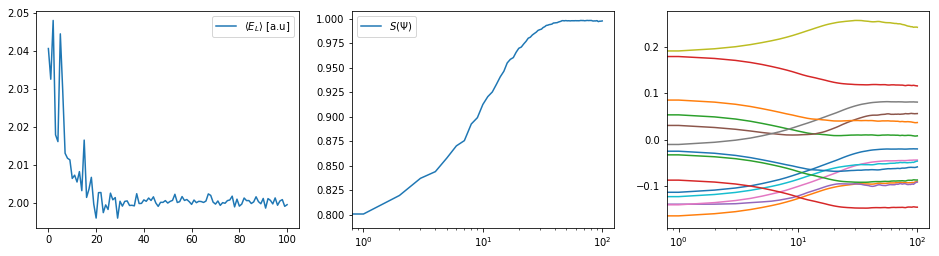

In [6]:
fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
eax.plot(rbm_energies, label=r"$\langle E_L\rangle$ [a.u]")
sax.semilogx(rbm_symmetries, label=r"$S(\Psi)$")
pax.semilogx(rbm_parameters)
eax.legend()
sax.legend()
plt.show()


In [7]:
compute_statistics_for_series(
    [H0.local_energy(rbm_sampler.next_configuration(), rbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 2.0001303910501407,
 'max': 2.0113629539923634,
 'min': 1.9934302034578373,
 'var': 6.6739718580448124e-06,
 'std': 0.002583403154376957,
 'sem': 5.70996260717217e-05,
 'CI': (2.000018411628192, 2.0002423704720895)}

## Symmetric RBM


In [19]:
srbm = SRBM(P * D, N, D)
srbm_sampler = ImportanceSampler(system, srbm, step_size=0.1)


In [20]:
srbm_energies = EnergyCallback(samples=5000)
srbm_symmetries = SymmetryCallback(samples=10000)
srbm_parameters = ParameterCallback()

train(
    srbm,
    H0,
    srbm_sampler,
    iters=20000,
    samples=1000,
    gamma=0,
    optimizer=AdamOptimizer(len(srbm.parameters)),
    call_backs=(srbm_energies, srbm_symmetries, srbm_parameters),
)


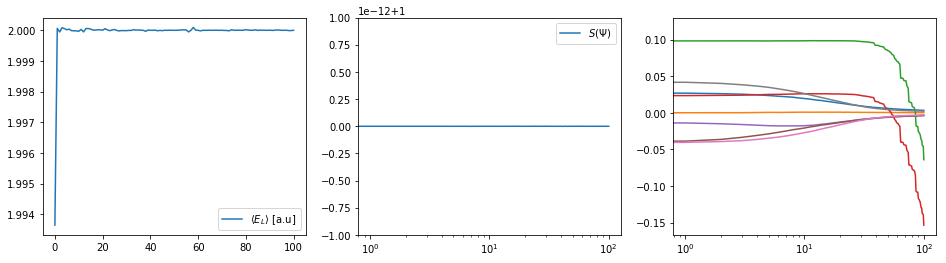

In [21]:
fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
eax.plot(srbm_energies, label=r"$\langle E_L\rangle$ [a.u]")
sax.semilogx(srbm_symmetries, label=r"$S(\Psi)$")
pax.semilogx(srbm_parameters)
eax.legend()
sax.legend()
plt.show()


In [11]:
compute_statistics_for_series(
    [H0.local_energy(srbm_sampler.next_configuration(), srbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 2.000015018983138,
 'max': 2.020582230056932,
 'min': 1.9933468554007021,
 'var': 1.1573001451225007e-05,
 'std': 0.00340191144082632,
 'sem': 5.316135608239247e-05,
 'CI': (1.999910793834034, 2.000119244132242)}

# Quantum Dots


In [116]:
H1 = RBMInteractingHamiltonian()


In [122]:
P, D = 3, 2  # Particles, dimensions
N = 9  # Hidden nodes
system = np.empty((P, D))


## Non-symmetric RBM


In [123]:
rbm = RBM(P * D, N)
rbm_sampler = ImportanceSampler(system, rbm, step_size=0.1)


In [124]:
rbm_energies = EnergyCallback(samples=50000)
rbm_symmetries = SymmetryCallback(samples=10000)
rbm_parameters = ParameterCallback()

train(
    rbm,
    H1,
    rbm_sampler,
    iters=50000,
    samples=2000,
    gamma=0.0001,
    optimizer=AdamOptimizer(len(rbm.parameters)),
    call_backs=(rbm_energies, rbm_symmetries, rbm_parameters),
)


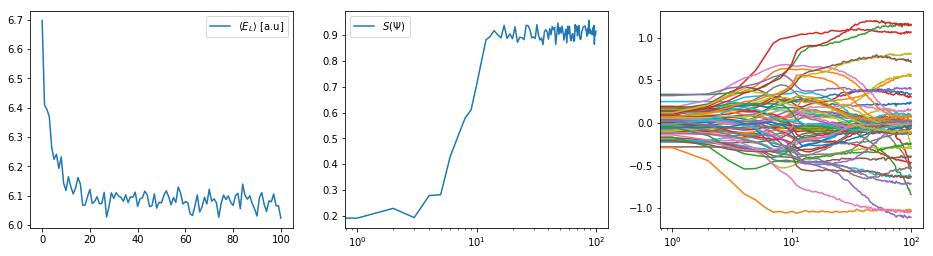

In [125]:
fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
eax.plot(rbm_energies, label=r"$\langle E_L\rangle$ [a.u]")
sax.semilogx(rbm_symmetries, label=r"$S(\Psi)$")
pax.semilogx(rbm_parameters)
eax.legend()
sax.legend()
plt.show()


In [126]:
compute_statistics_for_series(
    [H1.local_energy(rbm_sampler.next_configuration(), rbm) for _ in range(2 ** 22)],
    method="blocking",
)


{'mean': 6.082960080739854,
 'max': 10.461809406398679,
 'min': 5.542028298675093,
 'var': 0.05496430595401122,
 'std': 0.23444467567853022,
 'sem': 0.0025904302994148257,
 'CI': (6.077882180301085, 6.088037981178623)}

In [132]:
a = rbm.parameters[: P * D]
b = rbm.parameters[P * D : P * D + N]
w = rbm.parameters[P * D + N :].reshape(P * D, N)
a, b, w


(array([ 0.02451117,  0.56256218,  0.06985482, -0.46612285, -0.03757253,
        -0.12955977]),
 array([ 0.00920008, -0.56297955, -0.29032322, -0.00937214, -0.00459031,
        -0.00090752, -0.83920139, -0.5291498 , -0.0199992 ]),
 array([[-0.39245086, -0.03162599,  0.00212215, -0.29733728, -0.62911776,
          0.23672851, -0.0153636 , -0.01552262,  1.06354722],
        [-1.10760583,  0.02517153,  0.02222285, -0.52781627,  0.5462317 ,
          0.09066283, -0.00193504,  0.02827843, -0.24675881],
        [ 0.30570078, -0.0301922 ,  0.00349748, -0.12546499, -0.11482703,
          0.81318573, -0.01448471, -0.01453946, -1.02867909],
        [ 1.14409299,  0.00616107, -0.00721276, -0.6287321 ,  0.15463866,
         -0.04622566, -0.01685474,  0.00811945,  0.33943602],
        [ 0.08240427, -0.03705755, -0.01038102,  0.39889109,  0.71263496,
         -1.03623786, -0.02062719, -0.02295248, -0.04468942],
        [-0.02727319,  0.02106005,  0.01394865,  1.15094656, -0.71261629,
         -0.065

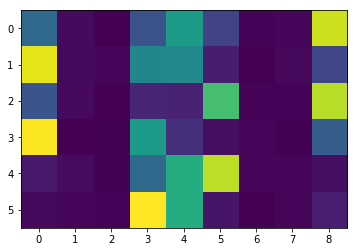

In [128]:
plt.imshow(np.abs(w))


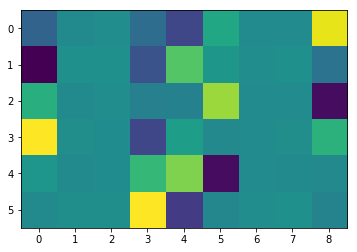

In [129]:
plt.imshow(w)


## Symmetric RBM


In [30]:
srbm = SRBM(P * D, N, D)
srbm_sampler = ImportanceSampler(system, srbm, step_size=0.1)


In [31]:
srbm_energies = EnergyCallback(samples=10000, verbose=True)
srbm_symmetries = SymmetryCallback(samples=100)
srbm_parameters = ParameterCallback()

train(
    srbm,
    H1,
    srbm_sampler,
    iters=40000,
    samples=2000,
    gamma=0.001,
    optimizer=AdamOptimizer(len(srbm.parameters)),
    call_backs=(srbm_energies, srbm_symmetries, srbm_parameters),
)


EnergyCallback(iter=0): 3.3423631859059824
EnergyCallback(iter=400): 3.322812319807335
EnergyCallback(iter=800): 3.2825225168276893
EnergyCallback(iter=1200): 3.2819958290053144
EnergyCallback(iter=1600): 3.2977280569058625
EnergyCallback(iter=2000): 3.221348468275243
EnergyCallback(iter=2400): 3.2532204890873198
EnergyCallback(iter=2800): 3.263309732477277
EnergyCallback(iter=3200): 3.2640204281384957
EnergyCallback(iter=3600): 3.29605716645038
EnergyCallback(iter=4000): 3.2699984950918974
EnergyCallback(iter=4400): 3.296365342076279
EnergyCallback(iter=4800): 3.2336486816426793
EnergyCallback(iter=5200): 3.210346195329382
EnergyCallback(iter=5600): 3.2521153326150087
EnergyCallback(iter=6000): 3.277841091579697
EnergyCallback(iter=6400): 3.282805240937354
EnergyCallback(iter=6800): 3.236058340420383
EnergyCallback(iter=7200): 3.209212832058811
EnergyCallback(iter=7600): 3.298048943226818
EnergyCallback(iter=8000): 3.286299620346715
EnergyCallback(iter=8400): 3.197315153231962
EnergyC

KeyboardInterrupt: 

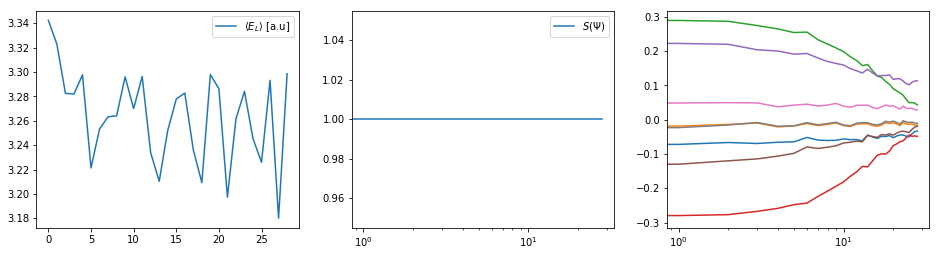

In [32]:
fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
eax.plot(srbm_energies, label=r"$\langle E_L\rangle$ [a.u]")
sax.semilogx(srbm_symmetries, label=r"$S(\Psi)$")
pax.semilogx(srbm_parameters)
eax.legend()
sax.legend()
plt.show()


In [33]:
compute_statistics_for_series(
    [H1.local_energy(srbm_sampler.next_configuration(), srbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 3.2511304913786083,
 'max': 7.9761983699563945,
 'min': 2.604826705999042,
 'var': 0.06467818398462946,
 'std': 0.2543190594206999,
 'sem': 0.003974220467396699,
 'CI': (3.243338859424281, 3.2589221233329355)}